$\textbf{Classification with Machine Learning:  Logit, Random Forests, Support Vector Machines, XGBoost, and ADaBoost}$

In this exercise we will look at classification when there are more than two categories.
Specifically we will examine classificaiton of credit ratings, from AAA to 'AA' 'A' 'BBB' 'BB' 'B' and 'CCC'.
We will try to predict the ratings from co-variates on specific firms:

- - {'WC_TA'}     Working Capital to Total Assets

- - {'RE_TA'}     Retained Earning to Total Assets

- - {'EBIT_TA'}   Earnings before Interets and Taxes to Total Assets

- - {'MVE_BVTD'}  Market Value of Equity to Book Value of Total Debt  

- - {'S_TA'}      Sales to Total Assets

- - {'Industry'}  Industry Classificaiton (1-12)


- The Industry classification is based on the Fama - French use of the SIC codes.

- - They assign each NYSE, AMEX, and NASDAQ stock to an industry portfolio at the end of June of year t based on its four-digit SIC code at that time. (We use Compustat SIC codes for the fiscal year ending in calendar year t-1. 

- - Whenever Compustat SIC codes are not available, we use CRSP SIC codes for June of year t.) We then compute returns from July of t to June of t+1.  As you can see, the higher the level of classificaiton the greater the degree of dependence on human capital.

- - The following definitions are used:


1 NoDur  - Consumer Nondurables -- Food, Tobacco, Textiles, Apparel, Leather, Toys
          0100-0999
          2000-2399
          2700-2749
          2770-2799
          3100-3199
          3940-3989

 2 Durbl - Consumer Durables -- Cars, TVs, Furniture, Household Appliances
          2500-2519
          2590-2599
          3630-3659
          3710-3711
          3714-3714
          3716-3716
          3750-3751
          3792-3792
          3900-3939
          3990-3999

 3 Manuf - Manufacturing -- Machinery, Trucks, Planes, Off Furn, Paper, Com Printing
          2520-2589
          2600-2699
          2750-2769
          3000-3099
          3200-3569
          3580-3629
          3700-3709
          3712-3713
          3715-3715
          3717-3749
          3752-3791
          3793-3799
          3830-3839
          3860-3899

 4 Enrgy - Oil, Gas, and Coal Extraction and Products
          1200-1399
          2900-2999

 5 Chems - Chemicals and Allied Products
          2800-2829
          2840-2899

 6 BusEq - Business Equipment -- Computers, Software, and Electronic Equipment
          3570-3579
          3660-3692
          3694-3699
          3810-3829
          7370-7379

 7 Telcm - Telephone and Television Transmission
          4800-4899

 8 Utils - Utilities
          4900-4949

 9 Shops - Wholesale, Retail, and Some Services (Laundries, Repair Shops)
          5000-5999
          7200-7299
          7600-7699

10 Hlth -  Healthcare, Medical Equipment, and Drugs
          2830-2839
          3693-3693
          3840-3859
          8000-8099

11 Money - Finance
          6000-6999

12 Other - Other -- Mines, Constr, BldMt, Trans, Hotels, Bus Serv, Entertainment


$\textbf{Data Sets}$

We will make use of three data sets, 
CreditRating_ExPost.dat,  for training
CreditRating_NewCompanies.dat, for testing out-of-sample                          
CreditRating_Historical.dat,  for overall evaluation

In [2]:
# Uncomment the following line to install shap
#!pip install shap


#!pip install pandas scikit-learn matplotlib 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
#import shap
import matplotlib.pyplot as plt
#import numba

# Read the data into a DataFrame
column_types = {
    'Column1': int,  # Integer
    'Column2': float,  # Float
    'Column3': float,  # Float
    'Column4': float,  # Float
    'Column5': float,  # Float
    'Column6': float,  # Float
    'Column7': float,  # Float
    'Column8': str  # String
}

# Read the Excel file with specified data types
#tbl = pd.read_excel('CreditRatingHist.xlsx', dtype=column_types)
tbl = pd.read_excel('CreditRatingHist.xlsx', header=0)
tblnew = pd.read_excel('CreditRatingNew1.xlsx', header=0)

# Print the first few rows to check if it's reading correctly
print(tbl.head())

#tbl = pd.read_excel('CreditRatingHist.xlsx')

# Check the size of the DataFrame
print(tbl.shape)
print(tblnew.shape)

# Create a RandomForestClassifier (or any suitable classifier)


      ID  WC_TA  RE_TA  EBIT_TA  MVE_BVTD   S_TA  Industry Rating
0  62394  0.013  0.104    0.036     0.447  0.142         3     BB
1  48608  0.232  0.335    0.062     1.969  0.281         8      A
2  42444  0.311  0.367    0.074     1.935  0.366         1      A
3  48631  0.194  0.263    0.062     1.017  0.228         4    BBB
4  43768  0.121  0.413    0.057     3.647  0.466        12    AAA
(3932, 8)
(1311, 8)


In [3]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Create a RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)

# Specify predictor and target variables
X = tbl.iloc[:,1:-1]
new_X = tblnew.iloc[:,1:-1]
new_Y = tblnew.iloc[:,-1]
print(X.columns)
y = tbl.iloc[:,-1]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
new_Y = label_encoder.fit_transform(new_Y)
y = tbl['Rating']

print(X.shape)




Index(['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry'], dtype='object')
(3932, 6)


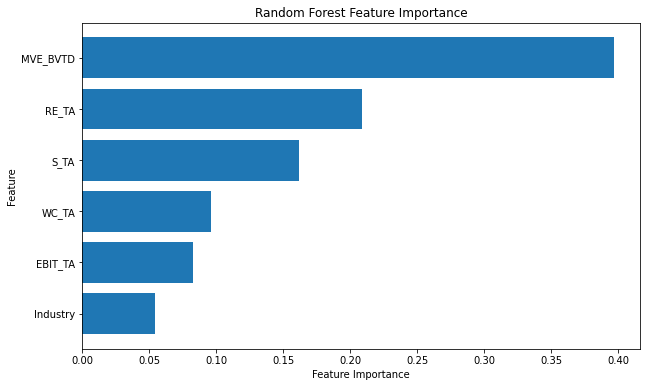

In [4]:
# Fit the classifier
classifier.fit(X, y)

# Get feature importances from the trained classifier
feature_importances = classifier.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()


$\textbf{Multinomial Logit Regression, Probit, and Weibull Regression}$

- Logit analysis assumes the following relation between probability $p_i$ of the binary dependent variable $y_{i}$, taking values zero or one, and the set of k explanatory variables x:

$p_{i}=\frac{1}{1+e^{-[x_{i}\beta+\beta_{0}]}}$

- To estimate the parameters $\beta$ and $\beta_{0}$, we simply maximize the following log likelihood function $\Lambda$ with respect to the parameter vector $\beta$: 

$\underset{<\beta>}{Max}\Lambda	={\displaystyle \prod}\left(p_{i}\right)^{y_{i}}\left(1-p_{i}\right)^{1-y_{i}}$
$ 	={\displaystyle \prod}%
\left(\frac{1}{1+e^{-[x_{i}\beta+\beta_{0}]}}\right)^{y_{i}}\left(\frac{e^{-[x_{i}\beta+\beta_{0}]}}{1+e^{-[x_{i}\beta+\beta_{0}]}}\right)^{1-y_{i}}$

where $y_{i\text{ }}$ represents the observed discrete outcomes.

- For optimization, it is sometimes easier to optimize the log-likelihood function 

$\ln(\Lambda):\underset{<\beta>}{Max}\ln(\Lambda)=y_{i}\ln(p_{i})+(1-y_{i})\ln\left(1-p_{i}\right)$

- The k dimensional coefficient vector $\beta$ does not represent a set of partial derivatives with respect to characteristics $x_{k}$.  The partial derivative comes from the following expression:

$\frac{\partial p_{i}}{\partial x_{i,k}}=\frac{e^{x_{i}\beta+\beta_{0}}}{\left(1+e^{x_{i}\beta+\beta_{0}}\right)^{2}}\beta_{k}$

- The partial derivatives are of particular interest if we wish to identify critical ”characteristics” which increase or decrease the likelihood of being in a particular state or category, such as representing a risk of default on a loan.In many cases, a risk-averse decision maker may take a more conservative approach.  For example, if the risk of have serious cancer exceeds .3, the physician may wish to diagnose the patient as a ”high risk”, warranting further diagnosis.

- The usual way to evaluate this logistic model is to examine the percentage of correct predictions, both ”true” and ”false”, set at 1 and 0, on the basis of the expected value.  Setting the estimated p_{i} at 0 or 1 depends of course on the choice of an appropriate "threshold value".  If the estimated probability or expected value p_{i}.is greater than .5, then p_{i\text{ }}is rounded to 1, and expected to take place.  Otherwise, it is not expected to occur.

- Probit models simply use the cumulative Gaussian normal distribution rather than the logistic function for calculating the probability of being in one category or not:

$p_{i}=\mathbf{\Phi}(x_{i}\beta+\beta_{0}) =\int_{-\infty}^{x_{i}\beta+\beta_{0}}\mathbf{\phi}(t)$

where the symbol $\mathbf{\Phi}$ is simply the cumulative standard distribution, while the lower case symbol, $\phi$, as before, represents the standard normal density function.   We maximize the same log-likelihood function.  

- -The partial derivatives, however, come from the following expression:

$\frac{\partial p_{i}}{\partial x_{i,k}}=\mathbf{\phi}(x_{i}\beta+\beta_{0})\beta_{k}$

- The Weibull distribution is an asymmetric distribution, strongly negatively skewed, approaching to zero more slowly slowly, and to one, more rapidly, than the probit and logit models:

$p_{i}=1-\exp(-\exp(x_{i}\beta+\beta_{0}))$

- -This distribution is used for classification in "survival analysis" and comes from "extreme value theory".  The partial derivative is given by the following equation:

$\frac{\partial p_{i}}{\partial x_{i,k}}=\mathbf{\exp}(x_{i}\beta+\beta_{0})\exp(-(x_{i}\beta+\beta_{0}))\beta_{k}$

- -This distribution is also called the Gompertz distribution and the regression model is called the "Gompit"model.

- Multinomial Logistic Regression, also known as Softmax Regression, is a statistical method used for classification tasks when the dependent variable (the target) has more than two categories. It's an extension of binary logistic regression, which is used for binary classification problems (two classes). In multinomial logistic regression, you can classify data into three or more classes.

Here's a detailed explanation of multinomial logistic regression:

- - Problem Setting: Multinomial logistic regression is used when you have a categorical target variable with three or more distinct classes or categories. These classes are mutually exclusive, meaning each observation belongs to only one class.

- - Model Representation: In multinomial logistic regression, you model the relationship between the input features and the categorical target variable by using a set of linear equations. Specifically, you use one equation for each class or category. If you have 'k' classes, you'll have 'k' sets of linear equations.
 
- -Activation Function: To convert the linear combination of input features into probabilities for each class, the model uses the Softmax function (also known as the normalized exponential function). The Softmax function takes the form:


$P(y_i = j | X) = \frac{e^{X \cdot \beta_j}}{\sum_{k=1}^{K} e^{X \cdot \beta_k}}$

where $P(y_i = j | X) $ represents the probability that the i-th observation belongs to class j, X is the vector of input features, $\beta_j$ is a vector of coefficients for class j, and K is the total number of classes.


- - Model Training: During training, the model's coefficients (β) are learned from the training data using optimization techniques like gradient descent. The goal is to find the parameter values that maximize the likelihood of the observed data given the model.

- - Prediction: Once the model is trained, you can use it to make predictions. For a given set of input features, the model calculates the probabilities of belonging to each class using the Softmax function. The class with the highest probability is then assigned as the predicted class.

- - Evaluation: To evaluate the performance of the multinomial logistic regression model, various metrics can be used, such as accuracy, precision, recall, F1-score, and confusion matrix, depending on the specifics of your classification problem.


$\underline{Summary}$

- Multinomial logistic regression is suitable for multi-class classification problems.
- It models the relationship between input features and multiple classes using linear equations and the Softmax function.
- During training, the model learns the coefficients that maximize the likelihood of the observed data.
- The predicted class is the one with the highest probability.
- Multinomial logistic regression is a fundamental and widely used technique in machine learning and statistics for solving multi-class classification problems, such as image classification, text categorization, and more.

In [5]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tools import add_constant
from pandas.api.types import CategoricalDtype

import pandas as pd
import statsmodels.api as sm

# Assuming you've already read the data correctly into 'tbl'

# Define the category order for the ordinal response variable
category_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC']
tbl['Rating'] = pd.Categorical(tbl['Rating'], categories=category_order, ordered=True)

# Define your predictor variables (X) and response variable (Y)
X = tbl[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]
import numpy as np

# Assuming X is your matrix
# Calculate the minimum and maximum values for each column (feature)
min_vals = X.min(axis=0)
max_vals = X.max(axis=0)

min_vals1 = new_X.min(axis=0)
max_vals1 = new_X.max(axis=0)

# Perform Min-Max scaling
X_normalized = (X - min_vals) / (max_vals - min_vals)
new_X_normalized = (new_X - min_vals1)/(max_vals1-min_vals1)
#X = sm.add_constant(X)
Y = tbl['Rating']


# Fit the multinomial logistic regression model
model = sm.MNLogit(Y, X_normalized)
results = model.fit(maxiter=1000)

# Print the summary of the model
print(results.summary())


C:\Users\mcnel\anaconda4\lib\site-packages\statsmodels\discrete\discrete_model.py:2331: RuntimeWarning: divide by zero encountered in log
  logprob = np.log(self.cdf(np.dot(self.exog,params)))
C:\Users\mcnel\anaconda4\lib\site-packages\statsmodels\discrete\discrete_model.py:2332: RuntimeWarning: invalid value encountered in multiply
  return np.sum(d * logprob)


Optimization terminated successfully.
         Current function value: nan
         Iterations 16
                          MNLogit Regression Results                          
Dep. Variable:                 Rating   No. Observations:                 3932
Model:                        MNLogit   Df Residuals:                     3896
Method:                           MLE   Df Model:                           30
Date:                Tue, 03 Oct 2023   Pseudo R-squ.:                     nan
Time:                        18:02:07   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -7070.1
Covariance Type:            nonrobust   LLR p-value:                       nan
 Rating=AA       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
WC_TA        -35.0828      6.509     -5.390      0.000     -47.840     -22.325
RE_TA         -2.8205     10.348 

$\textit{Interpretation}$

In a multinomial logistic regression, the coefficients represent the log-odds of moving from one category to another. In your case, since you are looking at the transition from AAA to AA, let's focus on the coefficients for the 'WC_TA' predictor variable.

For the 'WC_TA' variable:

Coefficient (coef) = -35.0828
p-value (P>|z|) < 0.001 (significant)

The coefficient of -35.0828 means that for a one-unit increase in 'WC_TA', the log-odds of moving from AAA to AA decrease by 35.0828 units. Since the p-value is less than 0.001 and significant, this suggests that the 'WC_TA' variable has a statistically significant effect on the transition from AAA to AA.

In more intuitive terms, an increase in 'WC_TA' would make it less likely for a company to transition from AAA to AA. This implies that as 'WC_TA' increases, the company is less likely to move from the higher rating (AAA) to the lower rating (AA).

Please note that the interpretation of the coefficients can vary depending on the coding scheme used for your categorical response variable. In your case, it seems like you are looking at the transition between two specific categories, so the interpretation is specific to that transition.

The same is true for the second equation for A. The coefficient WC_TA = -68.0484 shows that an increase in working capital reduces the odds of transition from AAA to A by even more.  

In [6]:
from sklearn.metrics import confusion_matrix
predicted_classes = results.predict(X_normalized).idxmax(axis=1)
label_mapping = {0: 'AAA', 1: 'AA', 2: 'A', 3: 'BBB', 4: 'BB', 5: 'B', 6: 'CCC'}
# Convert integer labels to string labels using the mapping


# Convert integer labels to string labels using the mapping
predicted_classes = predicted_classes.map(label_mapping)

# Create a confusion matrix
confusion_logistic = confusion_matrix(Y, predicted_classes)

# Plot the confusion matrix with custom axis labels
print(confusion_logistic)



[[398  58   0   0   1 118   0]
 [ 63 281  41   0   0   0   0]
 [  1  44 535   0   0   0   0]
 [  1   0   0 133 169   2  15]
 [  0   0   0  65 697 165   0]
 [ 70   0   0   2 184 759   0]
 [  0   0   2  36   7   0  85]]


In [9]:
predicted_probabilities1 = results.predict(new_X_normalized)
predicted_classes1 = predicted_probabilities1.idxmax(axis=1)

# Define the label mapping (if needed)
label_mapping = {0: 'AAA', 1: 'AA', 2: 'A', 3: 'BBB', 4: 'BB', 5: 'B', 6: 'CCC'}

# Map the predicted integer labels to string labels using the mapping
predicted_classes1 = predicted_classes1.map(label_mapping)



reverse_label_mapping = {'AAA': 0, 'AA': 1, 'A': 2, 'BBB': 3, 'BB': 4, 'B': 5, 'CCC': 6}

# Convert string labels in predicted_classes1 to numeric labels
predicted_classes1_numeric = predicted_classes1.map(reverse_label_mapping)
# Create a confusion matrix using the predicted classes and the true labels
confusion_logistic1 = confusion_matrix(new_Y, predicted_classes1_numeric)




def calculate_accuracy(confusion_matrix):
    TP = confusion_matrix[1, 1]  # True Positives
    TN = confusion_matrix[0, 0]  # True Negatives
    FP = confusion_matrix[0, 1]  # False Positives
    FN = confusion_matrix[1, 0]  # False Negatives
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy

Accuracy_logistic1 = calculate_accuracy(confusion_logistic1)

# Print the confusion matrix and accuracy
print("Confusion Matrix:")
print(confusion_logistic1)
print("Accuracy:", Accuracy_logistic1)


Confusion Matrix:
[[204   0   0   0   0   0   0]
 [138   0   0   0   0   0   0]
 [216   0   0   0   0   0   0]
 [  3   9  27  33  18   0   3]
 [ 62 100  83  36   3   1   0]
 [265  50   5   2   1   0   0]
 [  4   0   3   9   4   5  27]]
Accuracy: 0.5964912280701754


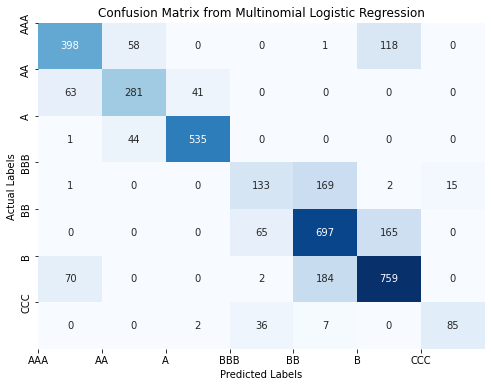

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_logistic, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set custom axis labels
class_labels = list(label_mapping.values())
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix from Multinomial Logistic Regression')
plt.show()







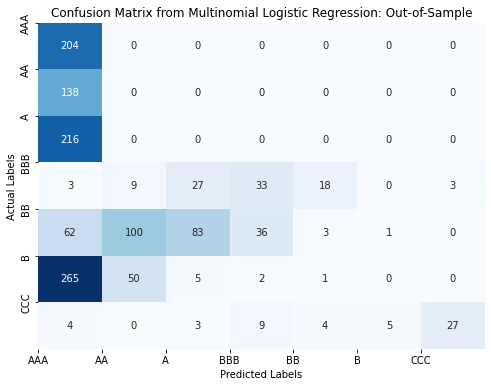

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_logistic1, annot=True, fmt='d', cmap='Blues', cbar=False)

# Set custom axis labels
class_labels = list(label_mapping.values())
plt.xticks(np.arange(len(class_labels)), class_labels)
plt.yticks(np.arange(len(class_labels)), class_labels)

plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix from Multinomial Logistic Regression: Out-of-Sample')
plt.show()


We see in the regression results that the industry classifications are not significant.


$\textbf{Random Forests}$

Now let's look at the Random Forests for different numbers of trees and leaves on the trees.

Random Forest is a powerful ensemble learning method used for both classification and regression tasks. It's based on the idea of combining multiple decision trees to improve the accuracy and generalization of predictions. Let's focus on using Random Forest for classification with seven classes and six features (arguments).

Random Forest for Classification:

- Ensemble of Decision Trees: Random Forest consists of a collection of decision trees, each trained on a different subset of the data and using a random subset of the features. This randomness helps prevent overfitting and promotes generalization.

- Bootstrap Sampling: Random Forest uses a technique called bootstrap sampling to create multiple subsets (called "bootstrap samples") from the original dataset. Each decision tree is trained on one of these bootstrap samples, which are generated by randomly selecting data points with replacement from the original dataset.

- Random Feature Selection: For each split in the decision tree, a random subset of features is considered. This helps decorrelate the trees and reduce overfitting. Typically, the square root of the total number of features is used.

- Voting for Classification: When making predictions, each decision tree in the forest independently predicts the class of a given input, and then a majority vote is taken among all the trees to determine the final predicted class. For example, if you have seven classes, the class with the most votes becomes the prediction.

Parameters to Tune:

- Number of Trees (n_estimators): This is the number of decision trees in your Random Forest. A larger number of trees generally leads to better performance, but it also increases computation time. You should experiment with different values to find the optimal number for your specific problem. Common values range from 100 to 1000.

- Max Depth of Trees (max_depth): This parameter controls the maximum depth of each decision tree in the forest. A deeper tree can fit the training data better but may lead to overfitting. You can experiment with different values or use techniques like cross-validation to find an appropriate depth.

- Minimum Samples per Leaf (min_samples_leaf): This parameter specifies the minimum number of samples required to be in a leaf node of a decision tree. Setting this value higher can prevent overfitting but may result in less flexibility. A good starting point is often 1, but you can increase it if you have a small dataset or are concerned about overfitting.

- Other Hyperparameters: Random Forest has other hyperparameters you can tune, such as the minimum samples required to split a node (min_samples_split), the maximum number of features to consider for each split (max_features), and others. Tuning these hyperparameters can also impact the model's performance.

- The ideal values for these hyperparameters depend on your specific dataset and problem. You should perform hyperparameter tuning using techniques like grid search or random search to find the best combination for your classification task. Cross-validation can help you assess the model's performance with different hyperparameters and avoid overfitting.

In summary, Random Forest is a versatile and powerful ensemble method for classification tasks. The number of trees and the number of samples in a leaf are important hyperparameters to tune, and you should experiment with different values to find the best configuration for your specific dataset and classification problem.






In [12]:
import pandas as pd

# Specify header=None to indicate that there is no header row
tbl = pd.read_excel('CreditRatingHist.xlsx', header=None)

# Extract the first row as column names
column_names = tbl.iloc[0]

# Remove the first row from the DataFrame
tbl = tbl[1:]

# Set the correct column names
tbl.columns = column_names

# Now you can work with the DataFrame containing the correct column names
print(tbl.head())

tblnew = pd.read_excel('CreditRatingNew1.xlsx', header=None)

# Extract the first row as column names
column_names = tblnew.iloc[0]

# Remove the first row from the DataFrame
tblnew = tblnew[1:]


# Set the correct column names
tblnew.columns = column_names

# Now you can work with the DataFrame containing the correct column names
print(tblnew.head())
print(len(tblnew))









0     ID  WC_TA  RE_TA EBIT_TA MVE_BVTD   S_TA Industry Rating
1  62394  0.013  0.104   0.036    0.447  0.142        3     BB
2  48608  0.232  0.335   0.062    1.969  0.281        8      A
3  42444  0.311  0.367   0.074    1.935  0.366        1      A
4  48631  0.194  0.263   0.062    1.017  0.228        4    BBB
5  43768  0.121  0.413   0.057    3.647  0.466       12    AAA
0     ID  WC_TA  RE_TA EBIT_TA MVE_BVTD   S_TA Industry Rating
1  60644  0.049   0.22   0.041      2.4  0.489        6     AA
2  33083  0.145   0.24   0.051    1.514   0.28        4    BBB
3  63830   0.17  0.177   0.056    1.685  0.455        7    BBB
4  84658  0.164  0.289   0.064    1.029  0.222        3    BBB
5  41734  0.078  0.066   0.044    0.417  0.147        9     BB
1311


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Read historical data into a DataFrame


# Specify predictor variables (X) and response variable (Y)
X = tbl[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]
Y = tbl[['Rating']]
print(len(X))

# Set the number of trees and minimum leaf size




3932


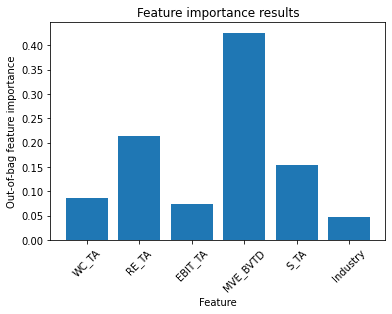

In [14]:
n_trees = 100
min_leaf_size = 2

# Create a RandomForestClassifier
classifier = RandomForestClassifier(
    n_estimators=n_trees,
    min_samples_leaf=min_leaf_size,
    oob_score=True,  # Enable out-of-bag error estimation
    random_state=0  # Set a random seed for reproducibility
)

# Fit the classifier
Y = Y.values.ravel()
classifier.fit(X, Y)

# Get out-of-bag feature importances
feature_importances = classifier.feature_importances_

# Get feature names
feature_names = X.columns

# Plot feature importances with feature names as x-axis labels
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Out-of-bag feature importance')
plt.title('Feature importance results')

# Extract class names
class_names = classifier.classes_

# Read data for new companies into a DataFrame

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Read data for new companies into a DataFrame and specify column names
#newDS = pd.read_csv('CreditRating_NewCompanies.dat', sep='\t', header=None, names=['ID', 'WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry', 'Rating'])

# Specify predictor variables for new companies (new_X)
new_X = tblnew[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]

# Specify the target variable (new_Y)
new_Y = tblnew[['Rating']]

# Handle missing values (if needed)
# new_X.fillna(0, inplace=True)  # Uncomment if you want to fill missing values with zero

# Convert the data to a suitable data type (e.g., 'float32')
new_X = new_X.astype('float32')

# Print the dimensions of new_X and new_Y for verification
print("Dimensions of new_X:", new_X.shape)
print("Dimensions of new_Y:", new_Y.shape)






Dimensions of new_X: (1311, 6)
Dimensions of new_Y: (1311, 1)


In [16]:
# Now you can make predictions with the cleaned and converted data
pred_class = classifier.predict(new_X)
classif_score = classifier.predict_proba(new_X)

# Create a DataFrame with predictions
predDS = pd.DataFrame({'ID': tblnew['ID'], 'PredRating': pred_class})

# Extract class names from the classifier
class_names = classifier.classes_

# Add class probability columns with correct names
for idx, class_name in enumerate(class_names):
    predDS[class_name] = classif_score[:, idx]




In [17]:
# Assuming you have executed the code snippet you provided

# Predict class labels for new_X
pred_class = classifier.predict(new_X)

# Predict class probabilities for new_X
classif_score = classifier.predict_proba(new_X)

# Create a DataFrame with predictions
predDS = pd.DataFrame({'ID': tblnew['ID'], 'PredRating': pred_class})

# Extract class names from the classifier
class_names = classifier.classes_

# Add class probability columns with correct names
for idx, class_name in enumerate(class_names):
    predDS[class_name] = classif_score[:, idx]

# Now you can obtain the predicted categories (predicted_categories) from pred_class
predicted_categories = pred_class


In [21]:

from sklearn.metrics import confusion_matrix

# Convert all labels to lowercase for consistency
actual_categories_lower = [label.lower() for label in new_Y['Rating']]
predicted_categories_lower = [label.lower() for label in predicted_categories]

# Generate the confusion matrix
confusion_rf = confusion_matrix(actual_categories_lower, predicted_categories_lower)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_rf)









Confusion Matrix:
[[152  20   0   0   0  32   0]
 [ 22 106  10   0   0   0   0]
 [  0  14 202   0   0   0   0]
 [  0   0   0  38  51   0   4]
 [  0   0   0  18 221  46   0]
 [ 31   0   0   0  57 235   0]
 [  0   0   0  13   2   0  37]]


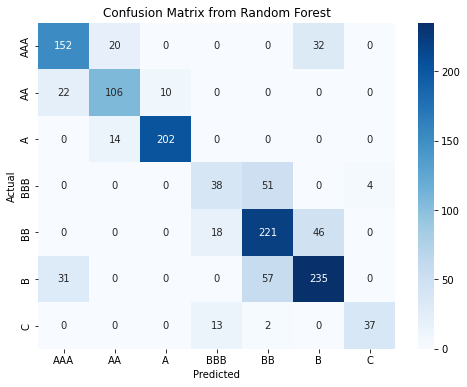

In [22]:
#!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix computed and stored in the variable 'confusion'
# 'confusion' should be a square matrix where each row and column corresponds to a category

# Define category labels (assuming you have 7 categories)
category_labels = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C']
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix from Random Forest')
plt.show()




In [23]:
# Assuming you have confusion matrices: confusion_rf and confusion_logisit

# Calculate accuracy for each confusion matrix
def calculate_accuracy(confusion_matrix):
    TP = confusion_matrix[1, 1]  # True Positives
    TN = confusion_matrix[0, 0]  # True Negatives
    FP = confusion_matrix[0, 1]  # False Positives
    FN = confusion_matrix[1, 0]  # False Negatives
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy

accuracy_rf = calculate_accuracy(confusion_rf)
accuracy_logistic = calculate_accuracy(confusion_logistic1)

# Compare the accuracies
print("Accuracy for Random Forest:", accuracy_rf)
print("Accuracy for Logistic Regression:", accuracy_logistic)

# Determine which model has higher accuracy
if accuracy_rf > accuracy_logistic:
    print("Random Forest has higher accuracy.")
elif accuracy_logistic > accuracy_rf:
    print("Logistic Regression has higher accuracy.")
else:
    print("Both models have the same accuracy.")


Accuracy for Random Forest: 0.86
Accuracy for Logistic Regression: 0.5964912280701754
Random Forest has higher accuracy.


In [24]:
X = tbl[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]
Y = tbl[['Rating']]
new_X = tbl[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA', 'Industry']]
new_Y = tbl[['Rating']]

XX = pd.concat([X, new_X], axis=0, ignore_index=True)
YY = pd.concat([Y, new_Y], axis=0, ignore_index=True)


$\textbf{Support Vector Machines}$



Following logistic regression and Random Forests, we will first try the Support Vector Machine.  It is basically an extension of logit and probit regression.

For a given set of classification arguments $x_i$, i=1,...K,  and a set of classificaitons $y_j$, j= 2,...J, we select coefficients to minimize:

$f(\textbf{w},b)$ = $\lambda \ \|\textbf{w}\|^2 + [\frac{1}{n} \Sigma_{i=1}^{n} max(0, 1-y(\textbf{w}'x-b))]$
where $\|w \|$ is the Euclidean norm of of the K-element parameter vector w:

$\|w \|$ = $\sqrt{\Sigma_k^K w_k^2}$


The parameter $\lambda$ is called the $\textit{soft margin parameter}$. It is also a $\textit{regularization}$ parameter.   

One way to work with this is to use a grid, $\lambda \in {2^{-5},2^{-3}, ....2^{15}}$ with cross validation.

- For the Kernel, the following are the options which can be used:

- - Linear Kernel (kernel='linear'): This is the simplest kernel and is suitable for linearly separable data. It works well when the classes can be separated by a straight line or plane.

- - Polynomial Kernel (kernel='poly'): The polynomial kernel can capture non-linear relationships in the data. It introduces the degree parameter, which controls the polynomial degree of the kernel. Higher degrees can model more complex relationships but may be prone to overfitting.

- - Radial Basis Function (RBF) Kernel (kernel='rbf' or kernel='gaussian'): The RBF kernel is one of the most popular choices for SVMs. It is highly versatile and can capture complex, non-linear decision boundaries. It introduces the gamma parameter, which controls the shape of the kernel. Smaller values of gamma lead to smoother decision boundaries, while larger values can result in more complex and tightly fitted boundaries.

- - For the RBF Function:  $\gamma$

- - - In Support Vector Machines (SVMs), the parameter $\gamma$ is a hyperparameter that controls the shape of the radial basis function (RBF) kernel, also known as the Gaussian kernel. The RBF kernel is commonly used in SVMs for capturing complex, non-linear relationships in the data.

- - - The  parameter $\gamma$  determines the influence of a single training example, or data point, on the decision boundary. Specifically, it controls the shape of the kernel function, and higher values of gamma result in a more complex, tightly fitted decision boundary. Conversely, lower values of gamma lead to a smoother decision boundary.

- - - When $\gamma$ is small, the influence of each training example is more widespread. The decision boundary becomes smoother and more "global," leading to a larger margin between support vectors and a less complex model. This can help prevent overfitting.

- - - When $\gamma$  is large, the influence of each training example is more localized. The decision boundary can become more flexible and tightly fitted to the training data, potentially leading to overfitting. It may result in a smaller margin between support vectors and a more complex model.

- - - In practice, the choice of $\gamma$  depends on the nature of the data and the specific problem you are trying to solve. It often requires experimentation and cross-validation to find the optimal gamma value for your SVM model. A small $\gamma$ can help when you have a lot of training data, while a larger $\gamma$  may be suitable for datasets with complex, non-linear patterns.



- - Sigmoid Kernel (kernel='sigmoid'): The sigmoid kernel is based on the sigmoid function and is suitable for problems where the classes are not linearly separable. It introduces the coef0 parameter to control the kernel's shape.



- The C parameter is $\textit{regularization}$ parameter. 

- - The parameter C controls the trade-off between maximizing the margin and minimizing the classification error. 

- - A smaller C encourages a larger margin but may allow some misclassifications in the training set. 

- - A larger C penalizes misclassifications more, which may lead to a smaller margin. 

- - You can tune C through cross-validation to find the best value for your specific dataset.



In [32]:
#!pip install xgboost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer


# Encode the categorical target variable (Y)
#label_encoder = LabelEncoder()
#Y_encoded = label_encoder.fit_transform(Y)
desired_class_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC']

# Create a LabelEncoder instance with the specified class order
label_encoder = LabelEncoder()
label_encoder.classes_ = desired_class_order
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Encode your categorical target variable (Y) using LabelEncoder



columns_to_convert = X_train[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA']]

for column in columns_to_convert:
    X_train[column] = X_train[column].astype(float)
    
columns_to_convert1 = X_test[['WC_TA', 'RE_TA', 'EBIT_TA', 'MVE_BVTD', 'S_TA']]

# Convert specific columns to float data type for new_X DataFrame
for column in columns_to_convert1:
     X_test[column] = X_test[column].astype(float)
    

label_encoder = LabelEncoder()
X_train['Industry'] = label_encoder.fit_transform(X_train['Industry'])
X_test['Industry'] = label_encoder.transform(X_test['Industry'])



# Fit the imputer and transform both training and testing data
#X_train1 = imputer.fit_transform(X_train)
#X_test1 = imputer.transform(X_test)




print(len(Y_train))


print(len(X_train))
print(len(X_test))
print(len(Y_test))

# Support Vector Machine (SVM) Classifier


2752
2752
1180
1180


C:\Users\mcnel\anaconda4\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM Accuracy: 0.70
SVM Confusion Matrix:
[[132   8   0   0   0  38   0]
 [ 27  78   7   0   0   0   0]
 [  1  22 155   0   0   0   0]
 [  0   0   0   1 115   0   0]
 [  0   0   0   0 219  37   0]
 [ 15   0   0   0  51 234   0]
 [  0   0   0  11  23   0   6]]
SVM Classification Report:
              precision    recall  f1-score   support

           A       0.75      0.74      0.75       178
          AA       0.72      0.70      0.71       112
         AAA       0.96      0.87      0.91       178
           B       0.08      0.01      0.02       116
          BB       0.54      0.86      0.66       256
         BBB       0.76      0.78      0.77       300
         CCC       1.00      0.15      0.26        40

    accuracy                           0.70      1180
   macro avg       0.69      0.59      0.58      1180
weighted avg       0.68      0.70      0.67      1180



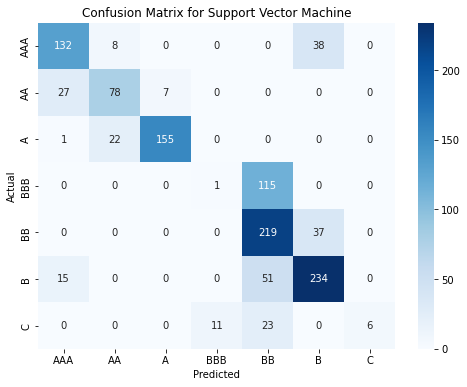

In [33]:

svm_classifier = SVC(kernel='rbf', C=2)
svm_classifier.fit(X_train, Y_train)

# Make predictions using the SVM classifier
Y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy:.2f}')

# Generate a confusion matrix for SVM
confusion_svm = confusion_matrix(Y_test, Y_pred_svm)
print('SVM Confusion Matrix:')
print(confusion_svm)

# Classification Report for SVM
svm_report = classification_report(Y_test, Y_pred_svm)
print('SVM Classification Report:')
print(svm_report)
category_labels = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C']
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_svm, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()



$\textbf{XGBoost}$


XGBoost (Extreme Gradient Boosting) is a powerful and popular ensemble learning algorithm that is commonly used for classification tasks, including multi-class classification with more than two outcomes. It's an extension of the gradient boosting framework, and it's particularly well-suited for structured data with multiple features. Here's an explanation of how XGBoost can be used for classification with seven outcomes based on six characteristics:

- Problem Setting:

You have a classification problem where you want to predict one of seven possible outcomes or classes based on six input characteristics or features.

- Ensemble Learning:

XGBoost is an ensemble learning technique that combines the predictions of multiple weak learners (typically decision trees) to create a strong, accurate model. It builds these trees sequentially, learning from the errors made by the previous trees.

- Decision Trees:

In XGBoost, decision trees are used as base models. These trees are relatively shallow to avoid overfitting. The depth of the trees is controlled by hyperparameters like max_depth and min_child_weight.

- Objective Function:

For multi-class classification problems like this one, XGBoost uses a specialized objective function called "multi-class softmax." This function extends the softmax activation function, which converts raw scores into class probabilities.

- Training:

- XGBoost iteratively fits decision trees to the data. 

- In each iteration (or boosting round), it does the following:

- - Computes the gradients and Hessians (second derivatives) of the loss function with respect to the predicted scores for each class.

- - Builds a new decision tree to minimize the loss, taking into account the gradients and Hessians.

- - Adds the new tree to the ensemble, adjusting the predictions of the previous trees based on its contribution.

- - Repeats this process for a specified number of boosting rounds or until a stopping criterion is met.

- Hyperparameter Tuning:

To get the best model for your specific problem, you can tune various hyperparameters like learning_rate, max_depth, subsample, and colsample_bytree. Hyperparameter tuning helps optimize the trade-off between model complexity and generalization.

- Prediction:

Once the XGBoost model is trained, you can use it to make predictions on new data. For each set of six characteristics, the model calculates a score for each of the seven classes. The class with the highest score is predicted as the output class.

- Evaluation:

To evaluate the model's performance, you can use metrics like accuracy, precision, recall, F1-score, and confusion matrix, depending on the specifics of your classification problem.

$\underline{Summary}$ 

- XGBoost is an ensemble learning algorithm that combines decision trees to create a strong classifier.

- It uses a specialized objective function for multi-class classification.

- Hyperparameter tuning is crucial for optimizing model performance.

- It can handle both binary and multi-class classification problems effectively.

- XGBoost is known for its speed and scalability, making it a popular choice for various machine learning tasks.

- XGBoost has been widely adopted in machine learning competitions and real-world applications due to its effectiveness and versatility. 

- It's a robust choice for multi-class classification problems like the one you described with seven outcomes based on six characteristics.








In [46]:
print(Y_pred)
print(Y_test)

[4 0 1 ... 4 2 4]
0    Rating
588      BB
348       A
1337     AA
676       B
3568     BB
...     ...
2006      A
1004    BBB
3465     BB
3785    AAA
1152    BBB

[1180 rows x 1 columns]


C:\Users\mcnel\anaconda4\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGboost Accuracy: 0.72
[[127  17   0   0   0  34   0]
 [ 16  83  13   0   0   0   0]
 [  1  13 164   0   0   0   0]
 [  0   0   0  48  59   0   9]
 [  0   0   0  21 190  45   0]
 [ 27   0   0   0  57 216   0]
 [  0   0   0  17   0   0  23]]
XGBoost Classification Report:


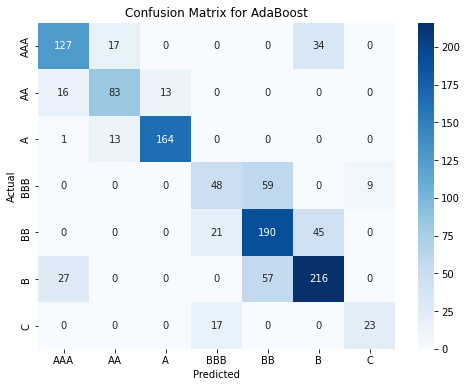

In [51]:
from xgboost import XGBClassifier

#xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))
lr = .2
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', eta = lr)
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable 'Ytrain' using label encoding
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Ytrain_encoded now contains numeric labels corresponding to your original categories
# For example, 'A' might be encoded as 0, 'AA' as 1, 'AAA' as 2, and so on.

# Now you can use Ytrain_encoded as your target variable in machine learning models.

#xgb_classifier.fit(X_train1, Y_train)
model.fit(X_train, Y_train_encoded)



Y_pred = model.predict(X_test)


# Make predictions using the XGBoost classifier
from sklearn.preprocessing import LabelEncoder

# Initialize a LabelEncoder
# Transform both Y_train and Y_test
Y_train_encoded = label_encoder.transform(Y_train['Rating'])
Y_test_encoded = label_encoder.transform(Y_test['Rating'])




# Compute the confusion matrix using the encoded Y_test and Y_pred
confusion_xgboost = confusion_matrix(Y_test_encoded, Y_pred)
xgboost_accuracy = accuracy_score(Y_test_encoded, Y_pred)
print(f'XGboost Accuracy: {xgboost_accuracy:.2f}')


print(confusion_xgboost)

# Classification Report for XGBoost

print('XGBoost Classification Report:')

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_xgboost, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()



$\textbf{AdaBoost:  Similarities with XGBoost}$

- AdaBoost 

- -AdaBoost typically uses weak learners, which are simple classifiers that perform slightly better than random guessing. Decision trees with just one level (stumps) are often used as weak learners in AdaBoost.

- - Weighted Samples: During training, AdaBoost assigns weights to each training sample. Initially, all weights are set equally. After each iteration, the weights of misclassified samples are increased, while the weights of correctly classified samples are decreased. This focuses the subsequent weak learners on the more challenging examples.

- - Sequential Training: AdaBoost builds an ensemble of weak learners sequentially. In each iteration, it selects the weak learner that minimizes the weighted classification error on the training data.


- - Weighted Voting: In the final ensemble, each weak learner is assigned a weight based on its accuracy. During prediction, the votes of the weak learners are weighted based on their performance. The final prediction is made by combining these weighted votes.

- -  Lack of Parallelism: AdaBoost is inherently sequential, as each weak learner depends on the outcome of the previous one. This can make it less suitable for parallel processing.
XGBoost:

- XGBppst

- -XGBoost uses decision trees as base models, but these trees can be deeper and more complex than the stumps used in AdaBoost. This allows XGBoost to capture more complex relationships in the data.

- - Gradient Boosting: XGBoost employs a gradient boosting framework, which optimizes the model by minimizing a specified loss function. It uses gradients and second-order derivatives of the loss function to guide the construction of each tree.

- -Parallel Processing: XGBoost is designed for parallel processing and can take advantage of multiple CPU cores, making it computationally efficient and scalable.

- -Regularization: XGBoost includes regularization techniques, such as L1 and L2 regularization, to control the complexity of the model and prevent overfitting.

- -  Handling Missing Values: XGBoost has built-in support for handling missing values in the dataset, reducing the need for data preprocessing.

- -  Custom Loss Functions: XGBoost allows users to define custom loss functions, making it adaptable to a wide range of problems beyond classification and regression.

- - Hyperparameter Tuning: XGBoost offers a wide range of hyperparameters that can be tuned to optimize model performance, including parameters for controlling tree depth, learning rate, and more.

$\underline{Summary}$: 


- AdaBoost focuses on combining simple weak learners and assigns weights to training samples.

- XGBoost uses more complex decision trees as base models and employs gradient boosting to optimize model performance.

- AdaBoost builds the ensemble sequentially, while XGBoost allows for parallelism.

- XGBoost includes regularization and custom loss function support.

- XGBoost provides more hyperparameter tuning options.

- In summary, AdaBoost and XGBoost are both ensemble methods. 

- XGBoost is generally more powerful and flexible due to its use of more complex base models, gradient boosting optimization, parallel processing support, and a wide range of hyperparameters. 

- AdaBoost can still be effective in certain situations, especially when you have simple weak learners and a limited amount of data. 

- The choice between the two algorithms depends on the specific problem and the trade-offs between simplicity and performance.

AdaBoost Accuracy: 0.50
AdaBoost Confusion Matrix:
[[507   0   0   0   1  67   0]
 [314   0  71   0   0   0   0]
 [ 17   0 563   0   0   0   0]
 [  0   0   0   2 216   0 102]
 [  1   0   0   0 789 121  16]
 [159   0   0   0 264 592   0]
 [  0   0   0   1  10   0 119]]
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.62      0.38       178
           1       1.00      0.01      0.02       112
           2       0.00      0.00      0.00       178
           3       0.44      0.53      0.48       116
           4       0.63      0.63      0.63       256
           5       0.67      0.84      0.74       300
           6       0.00      0.00      0.00        40

    accuracy                           0.50      1180
   macro avg       0.43      0.38      0.32      1180
weighted avg       0.49      0.50      0.43      1180



C:\Users\mcnel\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mcnel\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mcnel\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


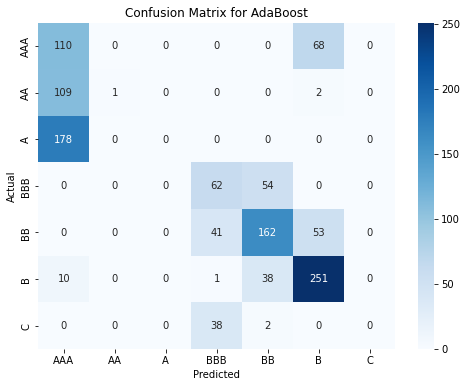

In [166]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

adaboost_classifier = AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate = .3)  # You can adjust n_estimators as needed

# Fit (train) the AdaBoost classifier on the training data
adaboost_classifier.fit(X_train, Y_train)
Y_pred_adaboost = adaboost_classifier.predict(X_test)
adaboost_accuracy = accuracy_score(Y_test, Y_pred_adaboost)
print(f'AdaBoost Accuracy: {adaboost_accuracy:.2f}')

# Generate a confusion matrix for AdaBoost
confusion_ada = confusion_matrix(Y_test, Y_pred_adaboost)
print('AdaBoost Confusion Matrix:')
print(adaboost_confusion)

# Classification Report for AdaBoost
adaboost_report = classification_report(Y_test, Y_pred_adaboost)
print('AdaBoost Classification Report:')
print(adaboost_report)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_ada, annot=True, fmt='d', cmap='Blues', xticklabels=category_labels, yticklabels=category_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost')
plt.show()

